In [1]:
import numpy as np
import pandas as pd
import random
import scipy.stats as sps
import matplotlib.pyplot as plt

random.seed(45)  

Generating an 'ID Feature' consisting of 800 data entries, followed by random rearrangement of these data points.

In [2]:
n=800
ids=list("ID"+str(i+100) for i in range(1,n+1))
random.shuffle(ids)

Forming three distinct groups labeled A, B, and C, followed by a random mixing of these groups.

In [3]:
groups = np.repeat(['A', 'B', 'C'], repeats=[267, 267, 266])
random.shuffle(groups)

Generating 'Feature_1' by randomly drawing samples from a normal distribution characterized by a mean of 2500 and a standard deviation of 300.

In [4]:
mean = 2500
std = 300
variable_1 = sps.norm.rvs(mean, std, size=n)
variable_1.mean()

2513.0278946888175

Generating 'Feature_2' by selecting samples at random from a normal distribution, which has a mean value of 400 and a standard deviation of 15.

In [5]:
mean = 400
std = 15
variable_2 = sps.norm.rvs(mean, std, size=n)
variable_2.mean()

400.0191724147806

Formulating a DataFrame that incorporates columns for 'ID', 'Group', 'Feature_1', and 'Feature_2'.

In [6]:
fake_data = pd.DataFrame({"ID":ids,"Group":groups,"Feature_1":variable_1,"Feature_2":variable_2})
fake_data['Group'].value_counts()

Group
B    267
A    267
C    266
Name: count, dtype: int64

Constructing 'Feature_3' by applying specific rules to the 'Group', 'Feature_1', and 'Feature_2' columns.

In [7]:
fake_data['Feature_3'] = np.nan

# Compute Feature_3 for each group
fake_data.loc[fake_data['Group'] == 'A', 'Feature_3'] = 3 * fake_data['Feature_1'] - 5 * fake_data['Feature_2']
fake_data.loc[fake_data['Group'] == 'B', 'Feature_3'] = 2 * fake_data['Feature_1']
fake_data.loc[fake_data['Group'] == 'C', 'Feature_3'] = -fake_data['Feature_1'] + fake_data['Feature_2']



Introducing an 'Additional Component' to the data, sampled from a normal distribution with a mean of 0 and a standard deviation of 12.

In [8]:
mean = 0
std = 12
add_component = sps.norm.rvs(mean, std, size=n)
fake_data['Feature_3'] += add_component


In [9]:
fake_data.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID763,C,2300.674377,428.925201,-1880.903675
1,ID204,C,2961.686578,395.100986,-2556.618639
2,ID734,C,2531.192524,367.370380,-2153.187626
3,ID422,B,2349.447507,391.014494,4690.569513
4,ID559,C,1919.307848,415.506138,-1491.942046


Identifying samples that exceed the value of 3000, as per the theoretical distribution model.

In [10]:
from scipy.stats import norm

# Define the mean and standard deviation
average = 2500
standard_deviation = 300

# Calculate the Z-score for the value 3000
z_value = (3000 - average) / standard_deviation

# Determine the fraction of the distribution exceeding the Z-score
fraction_exceeding_3000 = 1 - norm.cdf(z_value)

# Calculate the estimated count of samples over 3000
estimated_count_above_3000 = round(n * fraction_exceeding_3000)

print("Estimated count of samples over 3000:", estimated_count_above_3000)


Estimated count of samples over 3000: 38


Selection of samples from the dataset that have values exceeding 3000.

In [11]:
sum(fake_data['Feature_1']>3000)

52

Calculation of the mean and standard deviation for 'Feature_3' separately within each individual group.

In [12]:
grouped_data = fake_data.groupby('Group')['Feature_3'].agg(['mean', 'std'])

print(grouped_data)

              mean         std
Group                         
A      5533.423916  932.585251
B      5009.984485  631.213866
C     -2121.707350  304.664669


Creating a scatter plot to visually represent the relationship between 'Feature_3' and 'Feature_1'.

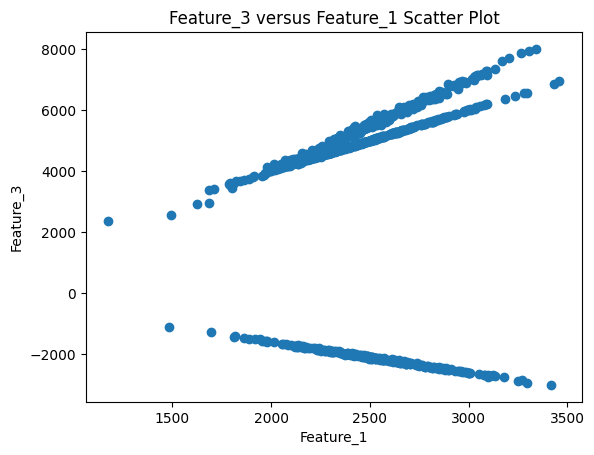

In [13]:
import matplotlib.pyplot as plt

# Plotting data points from 'fake_data' for 'Feature_1' and 'Feature_3'
plt.scatter(x=fake_data['Feature_1'], y=fake_data['Feature_3'])

# Setting labels for the x-axis and y-axis
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')

# Adding a title to the scatter plot
plt.title('Feature_3 versus Feature_1 Scatter Plot')

# Displaying the plot
plt.show()


Exporting the DataFrame into a CSV file named 'fake_data.csv'.

In [14]:
fake_data.to_csv('fake_data.csv', index=False)